# Project 2 - Ames Housing Data and Kaggle Challenge

In this project I was given the Ames Housin Dataset consisting of over 70 columns of different features relating to houses. My task was to create a regression model to be able to predict the price of the house at sale based on the characteristics of the house. This model will help real-estate agents, and others, to be able to more accurately price a new house going on the market. 

First and foremost I had to focus on exploring the data, identifying outliers and filling in missing values. After I made the data appropriate to fit in to a regression model I used the sklearn LinearRegression to model. I also fit a lasso and ridge models.

The success of the models was measured by R^2 and RMSE. Submission on Kaggle, allowed to check the model on a new set of data. 

## Exploring Cleaning, and Engineering the Data

In [1]:
#Here we are importing all the packages we will use throughout this file

import pandas as pd
import os
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

First I read in the data used to train the model. Along with it I uploaded the data we will use to test our model on Kaggle. 

In [2]:
df = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

In [3]:
df.shape, df_test.shape

((2051, 81), (878, 80))

The data has 2051 entries of 81 variables. The test data has 80 columns because it is missing the 'SalePrice' column. 

In [4]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
df.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


In [6]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
df_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Above I have printed out the list of column names we have. The description of what each variable means can be found on [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). I wanted to take a look at what is the variable type of each variable. I did this below with .info().

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
Id                 878 non-null int64
PID                878 non-null int64
MS SubClass        878 non-null int64
MS Zoning          878 non-null object
Lot Frontage       718 non-null float64
Lot Area           878 non-null int64
Street             878 non-null object
Alley              58 non-null object
Lot Shape          878 non-null object
Land Contour       878 non-null object
Utilities          878 non-null object
Lot Config         878 non-null object
Land Slope         878 non-null object
Neighborhood       878 non-null object
Condition 1        878 non-null object
Condition 2        878 non-null object
Bldg Type          878 non-null object
House Style        878 non-null object
Overall Qual       878 non-null int64
Overall Cond       878 non-null int64
Year Built         878 non-null int64
Year Remod/Add     878 non-null int64
Roof Style         878 non-null object
Roof M

### Target Variable

Here I am taking a closer look at the distrubution of Sale Price. The linear regression model assumes [normality](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html), and I needed to check for this. Taking a log of the target variable usually corrects any shortcomings in meeting our Multiple Linear Regression assumptions. Since the target variable was skewed, I went ahead and normalized it by taking the log of it.

Skew of original distribution: 1.5575514385863427
Skew of log of sale price: -0.14681576272177396


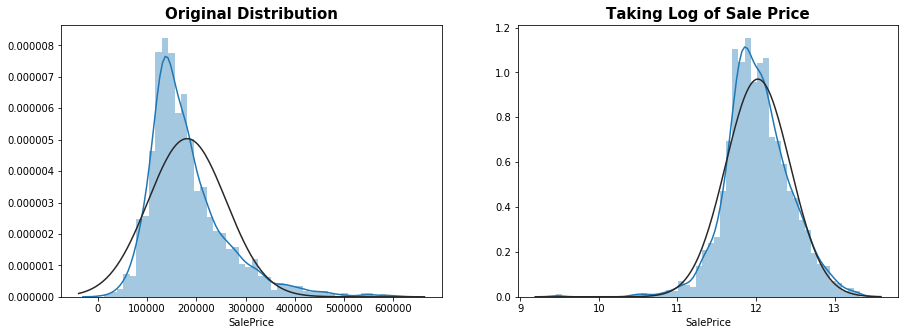

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

#plotting the distribution of original SalePrice column.
sns.distplot(df['SalePrice'], fit = stats.norm, ax = ax[0]);
ax[0].set_title('Original Distribution', weight = 'bold', fontsize = 15)
skew_saleprice = df['SalePrice'].skew()


#taking log() of SalePrice
loged_saleprice = np.log(df['SalePrice'])

sns.distplot(loged_saleprice, ax = ax[1], fit = stats.norm)
ax[1].set_title('Taking Log of Sale Price', weight = 'bold', fontsize = 15);
skew_loged = loged_saleprice.skew()
print('Skew of original distribution: {}'.format(skew_saleprice))
print('Skew of log of sale price: {}'.format(skew_loged))

The above graphs compare the skewness of the original SalePrice and the skewness after I took the log of the Sale Price. [Skew](https://brownmath.com/stat/shape.htm) approximates normal distribution when it gets closer to zero. You can see that the original data had a skew score of 1.56, which is quite large. After taking to log of the variable, the skew score went down to -0.15 which makes it now approximately symmetrical. 

What is taking a log of something? Taking a log of skewed data transforms it to a relatively normally distributed data. Taking a log of something pulls the data closer to it's median. 

In [11]:
#changing the SalePrice column to log(SalePrice)

df['SalePrice'] = loged_saleprice
df["SalePrice"].describe()

count    2051.000000
mean       12.024397
std         0.411316
min         9.456341
25%        11.773943
50%        11.998433
75%        12.273731
max        13.323927
Name: SalePrice, dtype: float64

### Subject Variables

#### Correlation

I went ahead and split the original data set in to two. One consisting of numerical values and the other of categorical.

I wanted to take a look at the correlation of the variables to Sale Price. I noticed that the two variables that are corrilated the most with Sale Price turned out to be Overall Qual and Gr Liv Area. This made sense to me since conventionally the quality of the house and the square feet of the living area are a big factor in pricing a house. 

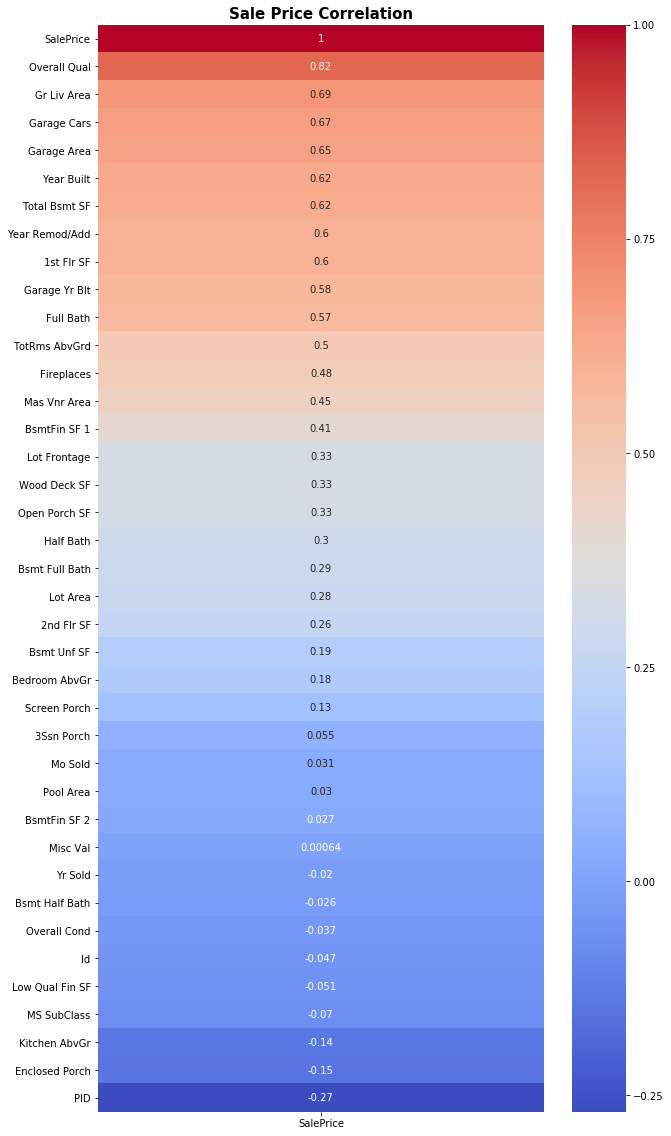

In [12]:
plt.figure(figsize=(10,20))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Sale Price Correlation', weight = 'bold', fontsize = 15);

In [13]:
# Looking at the smalles correlations, both positive and negative
large_corr = df.corr()[['SalePrice']]
large_corr[(large_corr['SalePrice']< 0.03) & (large_corr['SalePrice']>-0.03)]

,SalePrice
BsmtFin SF 2,0.026541
Bsmt Half Bath,-0.026018
Pool Area,0.029990
Misc Val,0.000637
Yr Sold,-0.019595


It appeared that the above values had the smallest correlation with Sale Price. Thus, they wouldn't be a good predictor for our model and could be removed from consideration. I decided to drop these columns. I left the Bsmt Half Bath column because I later on combine it with the rest of the Bathroom data.


In [14]:
df = df.drop(['BsmtFin SF 2', 'Pool Area', 'Misc Val', 'Yr Sold'], axis = 1)

In this case, since these variables will not be used in the prediction I needed to also drop them from the test data set. 

In [15]:
df_test = df_test.drop(['BsmtFin SF 2', 'Pool Area', 'Misc Val', 'Yr Sold'], axis = 1)

#### Collinear variables

When comparing the columns to check for collinearity, it jumped out at me that Garage Cars and Garage Area are basically telling us the same thing. I also took a look at Garage Qual and Garage Cond since they seemed to me to be redundant. I thought that Garage Area will be more representative of what buyers are looking at. After all, some people don't use the garage for only parking cars but also for storage. I made the decision to keep the Garage Area and drop Garage Cars for that reason.

In [16]:
df['Garage Cars'].head()

0    2.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: Garage Cars, dtype: float64

In [17]:
df['Garage Area'].head()

0    475.0
1    559.0
2    246.0
3    400.0
4    484.0
Name: Garage Area, dtype: float64

In [18]:
df = df.drop(['Garage Cars'], axis = 1)

Garage Qual and Garage Cond looked to contain exactly the same information. I kept Garage Qual and droped Garage Cond.

In [19]:
df['Garage Qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [20]:
df['Garage Cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [21]:
df = df.drop(['Garage Cond'], axis = 1)

The Exter Qual and Exter Cond to me seemed reduntant. Since Exter Cond seemed to be more encompassing with an extra value I kept it.

In [22]:
df['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [23]:
df['Exter Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [24]:
df = df.drop(['Exter Qual'], axis = 1)

The same could be said for the Bsmt Qual and Bsmt Cond.

In [25]:
df['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [26]:
df['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [27]:
df = df.drop(['Bsmt Cond'], axis = 1)

Below I repeated this process for the test data set. 

In [28]:
df = df.drop(['BsmtFin SF 1', 'Bsmt Unf SF'], axis =1) #these are also reduntant since there is a Total Bsmt SF

In [29]:
df_test = df_test.drop(['Garage Cars', 'Garage Cond', 'Exter Qual', 
                        'Bsmt Cond', 'BsmtFin SF 1', 'Bsmt Unf SF'], axis = 1)

#### Combining variable

Some of the variables can be combined in to one. For example, look at all the Square foot variables. There is basement square footage, 1st floor square footage and 2nd floor square footage. They can combined in to total square footage. That statistic would be more relavent to the house seeker. 

As a side note: When I did this for the SF and Bath, it bettered the model. However, when I tried to do the same thing for Porch, it worsened the result and I put it back the way it was.

Total SF:

In [30]:
df['TotalSF'] = df['1st Flr SF'] + df['2nd Flr SF'] + df['Total Bsmt SF']

In [31]:
df['TotalSF'].head()

0    2204.0
1    3035.0
2    2114.0
3    1828.0
4    2121.0
Name: TotalSF, dtype: float64

In [32]:
df = df.drop(['1st Flr SF', '2nd Flr SF', 'Total Bsmt SF'], axis = 1)

Total Bath:

In [33]:
df['TotalBath'] = df['Bsmt Full Bath'] + (0.5*df['Bsmt Half Bath']) + df['Full Bath'] + (0.5*df['Half Bath'])

In [34]:
df = df.drop(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'], axis = 1)

And as always I did the same thing to the test data set.

In [35]:
df_test['TotalSF'] = df_test['1st Flr SF'] + df_test['2nd Flr SF'] + df_test['Total Bsmt SF']

df_test = df_test.drop(['1st Flr SF', '2nd Flr SF', 'Total Bsmt SF'], axis = 1)

df_test['TotalBath'] = df_test['Bsmt Full Bath'] + (0.5*df_test['Bsmt Half Bath']) + df_test['Full Bath'] + (0.5*df_test['Half Bath'])

df_test = df_test.drop(['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'], axis = 1)

#### Quantitative Variables

I first started by taking a look at the quantitative values. I studied the missing values and the outliers. The scatter graphs below map the correlation of the most influential feature variables on our target variable. 

In [36]:
#diving the data into numerical variables

df_numerical_type = df.select_dtypes(include=[np.number])
df_test_numerical_type = df_test.select_dtypes(include=[np.number])


In [37]:
#Highest correlation subject variables

large_corr = df.corr()[['SalePrice']]
large_corr
top_corr = large_corr[(large_corr['SalePrice']>0.45) | (large_corr['SalePrice']<-0.45)].sort_values(by='SalePrice', 
                                                                                         ascending = False)

In [38]:
top_corr

,SalePrice
SalePrice,1.000000
Overall Qual,0.822774
TotalSF,0.773615
Gr Liv Area,0.687774
TotalBath,0.658568
Garage Area,0.650755
Year Built,0.624449
Year Remod/Add,0.599459
Garage Yr Blt,0.581093
TotRms AbvGrd,0.496502


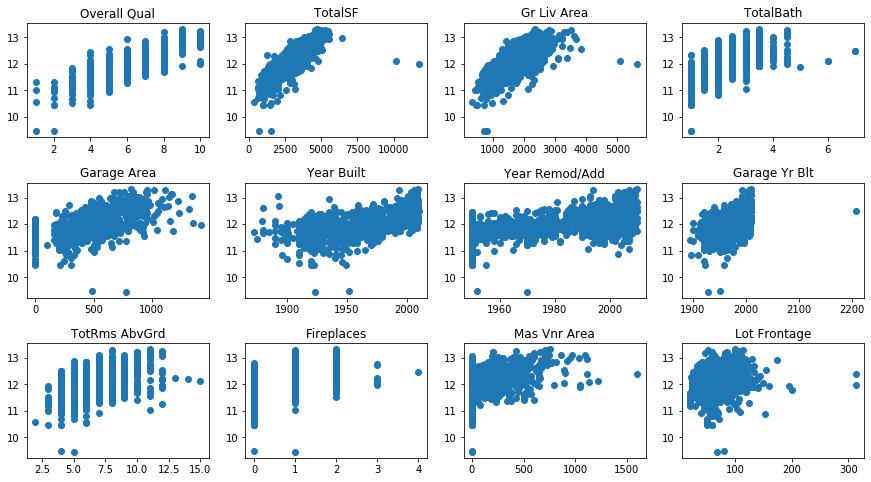

In [39]:
#Comparing with scatter plots the top correlated variables with target variable
# Sale Price is on the y axis
columns_top_corr = [['Overall Qual', 'TotalSF', 'Gr Liv Area', 'TotalBath'],
                    ['Garage Area', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt'],
                   ['TotRms AbvGrd', 'Fireplaces', 'Mas Vnr Area', 'Lot Frontage']]


fig, ax = plt.subplots(3, 4, figsize = (15,8))
plt.subplots_adjust(hspace = 0.4)

for i in range(4):
    for j in range(3):
       ax[j,i].scatter(df[columns_top_corr[j][i]], df['SalePrice'])
       ax[j,i].set_title(columns_top_corr[j][i]) 
       


##### Missing Values

Next, I took a look at missing values of the quatitative variables.

From the graph below we can get a sense of the variables that are missing values.

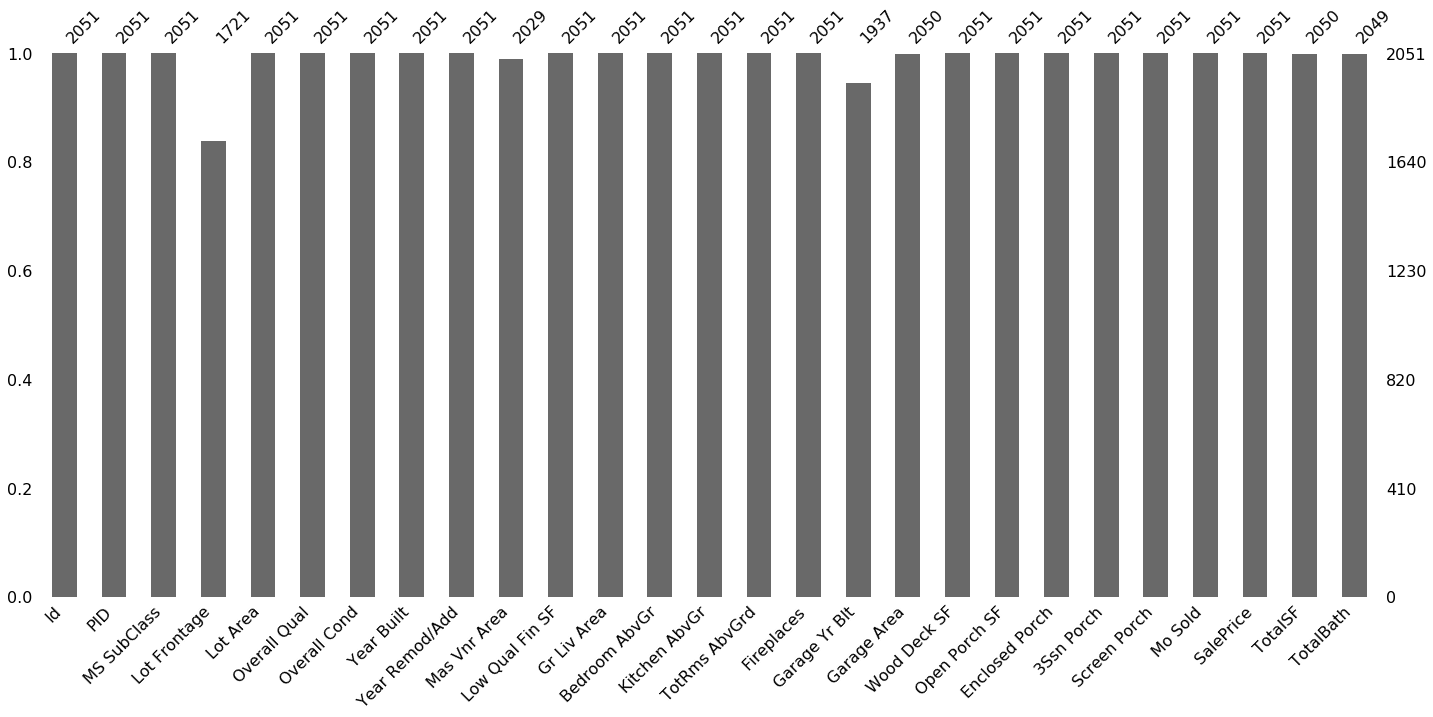

In [40]:
msno.bar(df_numerical_type);

In [41]:
df_numerical_type.isna().sum().sort_values(ascending=False).head(9)

Lot Frontage     330
Garage Yr Blt    114
Mas Vnr Area      22
TotalBath          2
Garage Area        1
TotalSF            1
Gr Liv Area        0
PID                0
MS SubClass        0
dtype: int64

In [42]:
#https://stackoverflow.com/questions/49243689/how-to-interpolate-a-partial-pandas-dataframe

#https://www.w3resource.com/pandas/series/series-interpolate.php

missing_col = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'TotalBath', 'Garage Area', 'TotalSF']

for col in missing_col: 
    df[col] = df[col].interpolate()

Here I decided to use the pandas .interpolate() method to fill my NaN. I used the default option, which is linear interpolation. The linear interpolation method treats the values as equally spaced. The one issue that might arise still, is that if the first variable of the column is an NaN, it will not be changed. I will check for this below. To make it easier to read, I wait until I dealt with the qualitative variables first.

In [43]:
df_test_numerical_type.isna().sum().sort_values(ascending=False).head(4)

Lot Frontage     160
Garage Yr Blt     45
Mas Vnr Area       1
TotalBath          0
dtype: int64

As always, I repeated the process on the test data.

In [44]:
missing_col_test = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']

for col in missing_col_test: 
    df_test[col] = df_test[col].interpolate()

##### Outliers

Above I scatter plotted the numerical variables that have the highest correlation with SalePrice. My main concern was to look at the outliers. Outliers will skew our model. They will pull the slope of the regression line towards it. 

Take a look at the scatter plot of Gr Liv Area, Total Bsmt SF, 1st Flr SF and Garage Yr Blt. Those variables have a high correlation with SalePrice. They also have the most distinct looking outliers on the graph. 

In statistics, there is a rule of thumb that anything that is below (1st quartile - 1.5 * inter-quartile range) and above (3rd quartile + 1.5 * inter-quartile range) than it is considered an outlier. [Khan Academy](https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/stats-box-whisker-plots/v/judging-outliers-in-a-dataset) has a more in debth explanation on this. 

Below I wrote a function to calculate the outliers. Originally, I wrote it keeping the 1.5 multiplier as stated above. However, it seemed in our case to choose a larger amount of outliers than I was comfortable with. So for this project I modified the formulate to: Q1 - 3*IQR and Q3 + 3*IQR.

In [45]:
#Function for calculating IQR and quartiles

def outliers(data, column):
    IQR = stats.iqr(data[column], interpolation = 'midpoint')
    print('IQR = {}'.format(IQR))
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    print('Q1 = {}'.format(Q1))
    print('Q3 = {}'.format(Q3))

    #Calculating the thresholds

    outliers_below = Q1 - (3*IQR)
    outliers_above = Q3 + (3*IQR)

    print('Lower outliers are below {}'.format(outliers_below))
    print('Higher outliers are above {}'.format(outliers_above))



In [46]:
outliers(df, 'Gr Liv Area')

IQR = 599.5
Q1 = 1129.0
Q3 = 1728.5
Lower outliers are below -669.5
Higher outliers are above 3527.0


In [47]:
df[df['Gr Liv Area']>(3527.0)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool QC,Fence,Misc Feature,Mo Sold,Sale Type,SalePrice,TotalSF,TotalBath
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,7,WD,12.559191,3820.0,2.0
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,0,Gd,NaN,NaN,1,New,11.982929,11752.0,4.5
1035,2667,902400110,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,...,0,410,NaN,GdPrv,NaN,6,WD,13.071070,4143.0,2.5
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,10,New,12.121875,10190.0,4.0
1897,2738,905427030,75,RL,60.0,19800,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,12,WD,12.936034,5508.0,3.5


The outliers that seemed too high came up with 5 houses. I went ahead and droped those rows in our data set so they wouldn't influece with our regression line. 

In [48]:
#dropping the values that are high outliers
df = df[df['Gr Liv Area']<(3527.0)]
df.shape

(2046, 66)

Garage Area:

In [49]:
outliers(df, 'Garage Area')

IQR = 257.0
Q1 = 319.0
Q3 = 576.0
Lower outliers are below -452.0
Higher outliers are above 1347.0


In [50]:
df[df['Garage Area']>1347]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool QC,Fence,Misc Feature,Mo Sold,Sale Type,SalePrice,TotalSF,TotalBath
337,2283,923205025,190,RL,90.0,32463,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,3,WD,12.031719,2871.0,2.0
1158,1426,906412010,20,RL,91.0,11778,Pave,NaN,Reg,Lvl,...,0,255,NaN,NaN,NaN,6,WD,13.071070,4547.0,3.0


In [51]:
df = df[df['Garage Area']<1347]

Total Square Footage:

In [52]:
outliers(df, 'TotalSF')

IQR = 985.0
Q1 = 2005.0
Q3 = 2990.0
Lower outliers are below -950.0
Higher outliers are above 5945.0


In [53]:
df = df[df['TotalSF']<(5943.5)]

Total Number of Baths:

In [54]:
outliers(df, 'TotalBath')

IQR = 0.625
Q1 = 2.0
Q3 = 2.625
Lower outliers are below 0.125
Higher outliers are above 4.5


In [55]:
df = df[df['TotalBath']<(5)]

#### Qualitative Variables

First I wanted to take a look at boxplot distributions of all the categorical variables. The ones that jumped out to me as maybe having the most influence was neighborhood, ms zoning and condition of the exterior. The neighborhood seems to fluctuate in price. The lowest prices are in zone C and A. And, not suprizingly the lowest prices are going to be with the poorest exterior condition. 

##### Correlation

In [56]:
df_categ_type = df.select_dtypes(exclude=[np.number])

df_categ_type.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Paved Drive', 'Pool QC', 'Fence',
       'Misc Feature', 'Sale Type'],
      dtype='object')

In [57]:
#Giving credit for the code: https://chrisalbon.com/python/data_wrangling/break_list_into_chunks_of_equal_size/
column_list = list(df_categ_type.columns)



# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]
        
categorical_list = list(chunks(column_list, 3))

len(categorical_list)


13

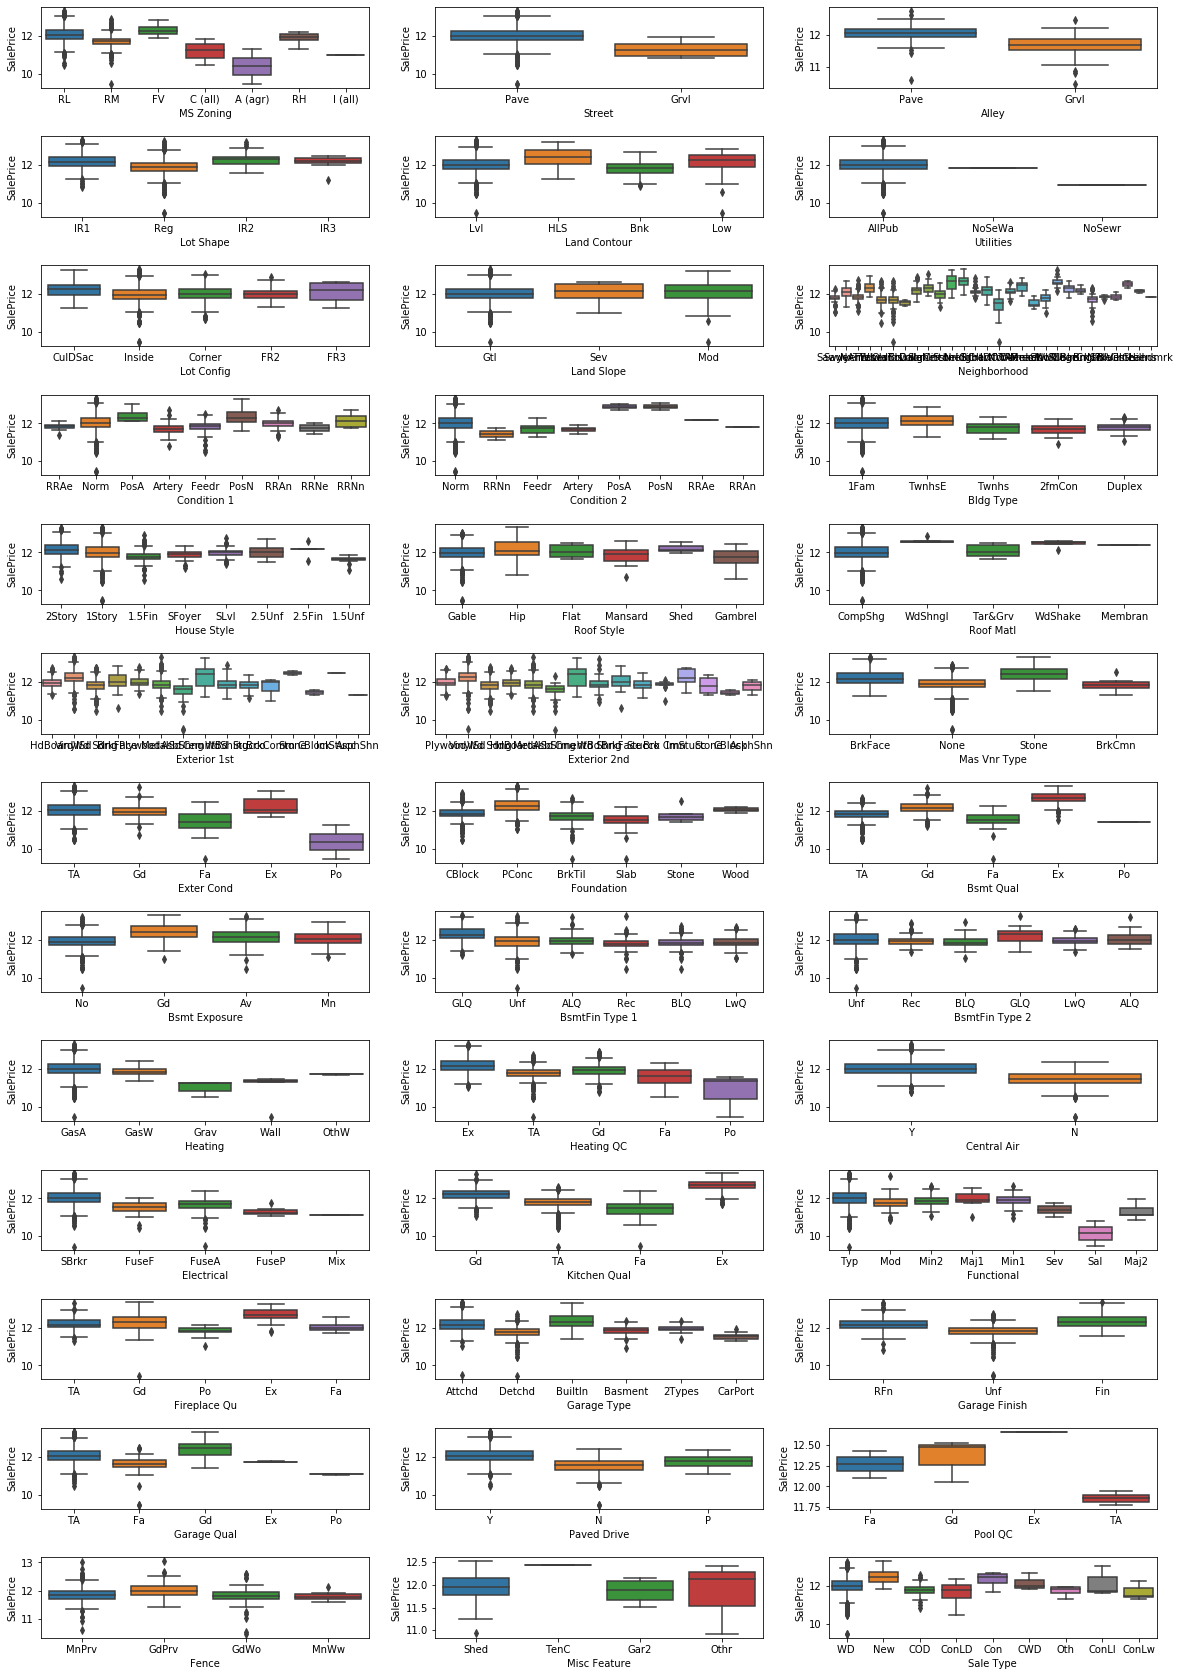

In [58]:
#Comparing with box plots the categorical variables with target variable


fig, ax = plt.subplots(13, 3, figsize = (20,30))
plt.subplots_adjust(hspace = 0.6)

for i in range(3):
    for j in range(13):
       sns.boxplot(df[categorical_list[j][i]], df['SalePrice'], ax = ax[j,i])
       

##### Missing Values

In [59]:
df_categ_type.isna().sum().sort_values(ascending=False).head(14)

Pool QC           2030
Misc Feature      1974
Alley             1898
Fence             1640
Fireplace Qu       997
Garage Qual        111
Garage Finish      111
Garage Type        110
Bsmt Exposure       57
BsmtFin Type 2      55
Bsmt Qual           54
BsmtFin Type 1      54
Mas Vnr Type        22
Neighborhood         0
dtype: int64

There is a lot more categorical missing values compared to numerical data. 

The biggest missing value offenders come out to be "Pool QC", "Misc Feature", "Alley", "Fence", "Fireplace Qu". They all have 1000 or more missing values.

Below are the difinitions of these values.

Pool QC: Pool quality Misc Feature : Miscellaneous feature not covered in other categories Alley: Type of alley access Fence: Fence quality Fireplace Qu: Fireplace quality

Since majority of these values are missing, it makes it hard to interpolate. I decided to drop these columns. 

In [60]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis = 1)

df_test = df_test.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis = 1)

For the remaining missing categorical data I decided to fill the NaN values with 'missing'. This was to prevent a problem when I called the get dummies function.

In [61]:
for col in ('Garage Qual', 'Garage Finish', 'Garage Type', 'Bsmt Exposure'
    , 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Qual', 'Mas Vnr Type'):
    df[col] = df[col].fillna('missing')

From below we see that the only missing value left is the one Lot Frontage value that failed to be interpolated. Since it is numerical and there is only one, I droped that row. 

In [62]:
df.isna().sum().sort_values(ascending=False).head(7)

Lot Frontage    1
TotalBath       0
Bldg Type       0
Exter Cond      0
Mas Vnr Area    0
Mas Vnr Type    0
Exterior 2nd    0
dtype: int64

In [63]:
df = df.dropna()

In [64]:
df.isna().sum().sort_values(ascending=False).head(7)

TotalBath       0
Bsmt Qual       0
Exter Cond      0
Mas Vnr Area    0
Mas Vnr Type    0
Exterior 2nd    0
Exterior 1st    0
dtype: int64

I just needed to now check out the missing values of the test data. 

In [65]:
df_test_categ_type = df_test.select_dtypes(exclude=[np.number])

df_test_categ_type.isna().sum().sort_values(ascending=False).head(14)

Garage Qual       45
Garage Finish     45
Garage Type       44
Bsmt Qual         25
BsmtFin Type 2    25
BsmtFin Type 1    25
Bsmt Exposure     25
Mas Vnr Type       1
Electrical         1
Bldg Type          0
Condition 2        0
Condition 1        0
Neighborhood       0
Land Slope         0
dtype: int64

In [66]:
for col in ('Garage Qual', 'Garage Finish', 'Garage Type', 'Bsmt Qual'
    , 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Exposure', 'Mas Vnr Type', 'Electrical'):
    df_test[col] = df_test[col].fillna('missing')

In [67]:
df_test.isna().sum().sort_values(ascending=False).head(5)

TotalBath       0
TotalSF         0
Exter Cond      0
Mas Vnr Area    0
Mas Vnr Type    0
dtype: int64

#### One-Hot Encoding

From the box plots above, I gathered that the variables 'Street' and 'Central Air' are of boolen Y/N format. Thus, I could easily change their format to 0/1.

In [68]:
df['street_enc'] = pd.get_dummies(df['Street'], drop_first = True)

df_test['street_enc'] = pd.get_dummies(df_test['Street'], drop_first = True)

In [69]:
df['central_air_enc'] = pd.get_dummies(df['Central Air'], drop_first = True)

df_test['central_air_enc'] = pd.get_dummies(df_test['Central Air'], drop_first = True)

In [70]:
df = df.drop('Street', axis = 1)

df_test = df_test.drop('Street', axis = 1)

In [71]:
df = df.drop('Central Air', axis = 1)

df_test = df_test.drop('Central Air', axis = 1)

In [72]:
df_categ_type = df.select_dtypes(exclude=[np.number])
df_categ_type.columns


Index(['MS Zoning', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Paved Drive', 'Sale Type'],
      dtype='object')

Below, with the count plot, I took a look at the distribution of the categorical variables. A good number of them, you can see that one classification prevails. For example, for Utilities, majority of the houses have all public utilities. For these variables, I decided to apply a manual encoding method. All the classifications that were in the majority were assigned to 1, and the rest were assigned to 0. 

In [73]:
df_cat_type_2 = df.select_dtypes(exclude=[np.number])

column_list_2 = list(df_cat_type_2.columns)

categorical_list_2 = list(chunks(column_list_2, 3))

len(categorical_list_2)

11

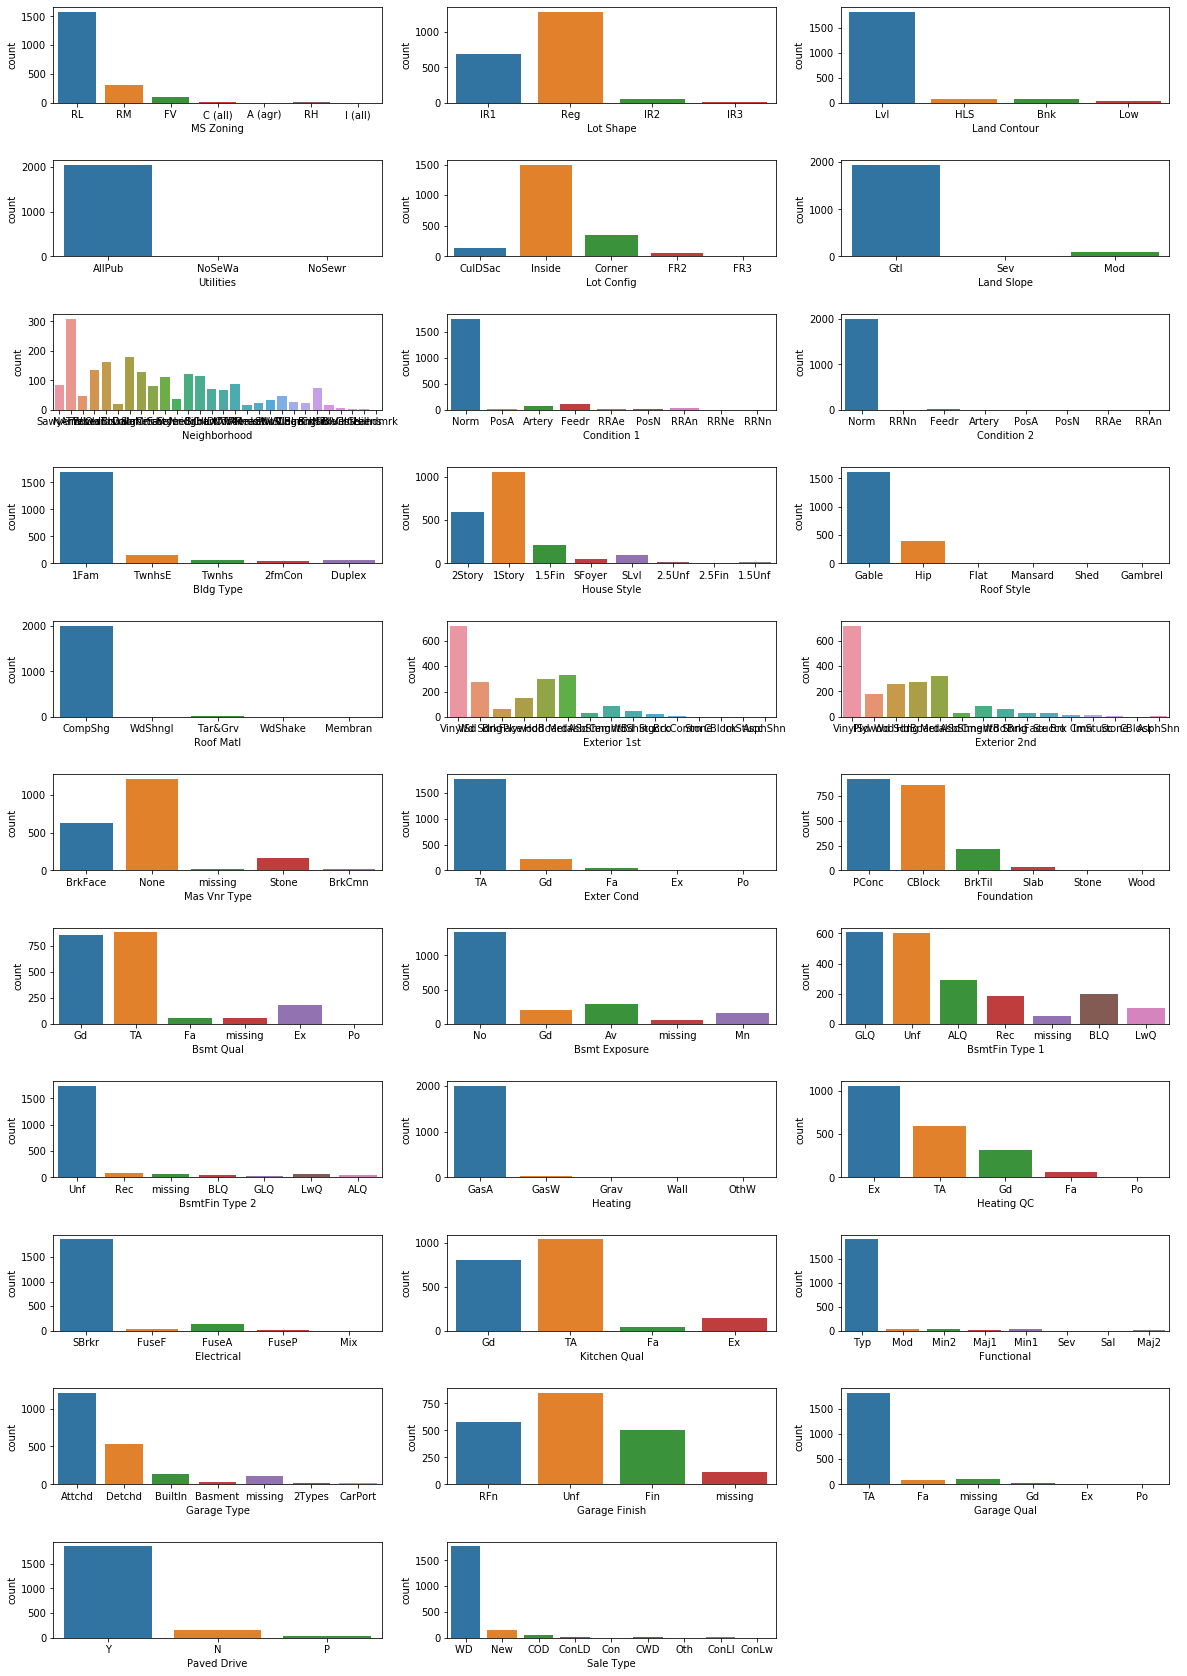

In [74]:
fig, ax = plt.subplots(11, 3, figsize = (20,30))
plt.subplots_adjust(hspace = 0.6)

for i in range(3):
    for j in range(11):
        if (j == 10) and (i == 2):
            fig.delaxes(ax[10][2])
        else:
           sns.countplot(df[categorical_list_2[j][i]], ax = ax[j,i])


Paved Drive:

In [75]:
#https://datatofish.com/if-condition-in-pandas-dataframe/


df.loc[df['Paved Drive'] == 'Y', 'PavedDriveEnc'] = 1
df.loc[df["Paved Drive"] != 'Y', 'PavedDriveEnc'] = 0

df_test.loc[df_test['Paved Drive'] == 'Y', 'PavedDriveEnc'] = 1
df_test.loc[df_test["Paved Drive"] != 'Y', 'PavedDriveEnc'] = 0

In [76]:
df = df.drop('Paved Drive', axis = 1)

df_test = df_test.drop('Paved Drive', axis = 1)

Electrical:

In [77]:
df.loc[df['Electrical'] == 'SBrkr', 'ElectricalEnc'] = 1
df.loc[df["Electrical"] != 'SBrkr', 'ElectricalEnc'] = 0

df_test.loc[df_test['Electrical'] == 'SBrkr', 'ElectricalEnc'] = 1
df_test.loc[df_test["Electrical"] != 'SBrkr', 'ElectricalEnc'] = 0

In [78]:
df = df.drop('Electrical', axis = 1)

df_test = df_test.drop('Electrical', axis = 1)

MS Zoning:

In [79]:
df.loc[df['MS Zoning'] == 'RL', 'MSZoningEnc'] = 1
df.loc[df["MS Zoning"] != 'RL', 'MSZoningEnc'] = 0

df_test.loc[df_test['MS Zoning'] == 'RL', 'MSZoningEnc'] = 1
df_test.loc[df_test["MS Zoning"] != 'RL', 'MSZoningEnc'] = 0

df = df.drop('MS Zoning', axis = 1)

df_test = df_test.drop('MS Zoning', axis = 1)

Utilities:

In [80]:
df.loc[df['Utilities'] == 'AllPub', 'UtilitiesEnc'] = 1
df.loc[df["Utilities"] != 'AllPub', 'UtilitiesEnc'] = 0

df_test.loc[df_test['Utilities'] == 'AllPub', 'UtilitiesEnc'] = 1
df_test.loc[df_test["Utilities"] != 'AllPub', 'UtilitiesEnc'] = 0

df = df.drop('Utilities', axis = 1)

df_test = df_test.drop('Utilities', axis = 1)

Condition 1:

In [81]:
df.loc[df['Condition 1'] == 'Norm', 'Condition1Enc'] = 1
df.loc[df["Condition 1"] != 'Norm', 'Condition1Enc'] = 0

df_test.loc[df_test['Condition 1'] == 'Norm', 'Condition1Enc'] = 1
df_test.loc[df_test["Condition 1"] != 'Norm', 'Condition1Enc'] = 0

df = df.drop('Condition 1', axis = 1)

df_test = df_test.drop('Condition 1', axis = 1)

Bldg Type:

In [82]:
df.loc[df['Bldg Type'] == '1Fam', 'BldgTypeEnc'] = 1
df.loc[df["Bldg Type"] != '1Fam', 'BldgTypeEnc'] = 0

df_test.loc[df_test['Bldg Type'] == '1Fam', 'BldgTypeEnc'] = 1
df_test.loc[df_test["Bldg Type"] != '1Fam', 'BldgTypeEnc'] = 0

df = df.drop('Bldg Type', axis = 1)

df_test = df_test.drop('Bldg Type', axis = 1)

Roof Matl:

In [83]:
df.loc[df['Roof Matl'] == 'CompShg', 'RoofMatlEnc'] = 1
df.loc[df["Roof Matl"] != 'CompShg', 'RoofMatlEnc'] = 0

df_test.loc[df_test['Roof Matl'] == 'CompShg', 'RoofMatlEnc'] = 1
df_test.loc[df_test["Roof Matl"] != 'CompShg', 'RoofMatlEnc'] = 0

df = df.drop('Roof Matl', axis = 1)

df_test = df_test.drop('Roof Matl', axis = 1)

Exter Cond:

In [84]:
df.loc[df['Exter Cond'] == 'TA', 'ExterCondEnc'] = 1
df.loc[df["Exter Cond"] != 'TA', 'ExterCondEnc'] = 0

df_test.loc[df_test['Exter Cond'] == 'TA', 'ExterCondEnc'] = 1
df_test.loc[df_test["Exter Cond"] != 'TA', 'ExterCondEnc'] = 0

df = df.drop('Exter Cond', axis = 1)

df_test = df_test.drop('Exter Cond', axis = 1)

BsmtFin Type 2:

In [85]:
df.loc[df['BsmtFin Type 2'] == 'Unf', 'BsmtFin TYpe 2 Enc'] = 1
df.loc[df["BsmtFin Type 2"] != 'Unf', 'BsmtFin TYpe 2 Enc'] = 0

df_test.loc[df_test['BsmtFin Type 2'] == 'Unf', 'BsmtFin TYpe 2 Enc'] = 1
df_test.loc[df_test["BsmtFin Type 2"] != 'Unf', 'BsmtFin TYpe 2 Enc'] = 0

df = df.drop('BsmtFin Type 2', axis = 1)

df_test = df_test.drop('BsmtFin Type 2', axis = 1)

Heating:

In [86]:
df.loc[df['Heating'] == 'GasA', 'HeatingEnc'] = 1
df.loc[df["Heating"] != 'GasA', 'HeatingEnc'] = 0

df_test.loc[df_test['Heating'] == 'GasA', 'HeatingEnc'] = 1
df_test.loc[df_test["Heating"] != 'GasA', 'HeatingEnc'] = 0

df = df.drop('Heating', axis = 1)

df_test = df_test.drop('Heating', axis = 1)

Sale Type:

In [87]:
df.loc[df['Sale Type'] == 'WD ', 'SaleTypeEnc'] = 1
df.loc[df['Sale Type'] != 'WD ', 'SaleTypeEnc'] = 0

df_test.loc[df_test['Sale Type'] == 'WD ', 'SaleTypeEnc'] = 1
df_test.loc[df_test['Sale Type'] != 'WD ', 'SaleTypeEnc'] = 0

df = df.drop('Sale Type', axis = 1)

df_test = df_test.drop('Sale Type', axis = 1)

Land Countour:

In [88]:
df.loc[df['Land Contour'] == 'Lvl', 'LandContourEnc'] = 1
df.loc[df['Land Contour'] != 'Lvl', 'LandContourEnc'] = 0

df_test.loc[df_test['Land Contour'] == 'Lvl', 'LandContourEnc'] = 1
df_test.loc[df_test['Land Contour'] != 'Lvl', 'LandContourEnc'] = 0

df = df.drop('Land Contour', axis = 1)

df_test = df_test.drop('Land Contour', axis = 1)

Land Slope:

In [89]:
df.loc[df['Land Slope'] == 'Gtl', 'LandSlopeEnc'] = 1
df.loc[df['Land Slope'] != 'Gtl', 'LandSlopeEnc'] = 0

df_test.loc[df_test['Land Slope'] == 'Gtl', 'LandSlopeEnc'] = 1
df_test.loc[df_test['Land Slope'] != 'Gtl', 'LandSlopeEnc'] = 0

df = df.drop('Land Slope', axis = 1)

df_test = df_test.drop('Land Slope', axis = 1)

Condition 2:

In [90]:
df.loc[df['Condition 2'] == 'Norm', 'Condition2Enc'] = 1
df.loc[df["Condition 2"] != 'Norm', 'Condition2Enc'] = 0

df_test.loc[df_test['Condition 2'] == 'Norm', 'Condition2Enc'] = 1
df_test.loc[df_test["Condition 2"] != 'Norm', 'Condition2Enc'] = 0

df = df.drop('Condition 2', axis = 1)

df_test = df_test.drop('Condition 2', axis = 1)

Functional:

In [91]:
df.loc[df['Functional'] == 'Typ', 'FunctionalEnc'] = 1
df.loc[df["Functional"] != 'Typ', 'FunctionalEnc'] = 0

df_test.loc[df_test['Functional'] == 'Typ', 'FunctionalEnc'] = 1
df_test.loc[df_test["Functional"] != 'Typ', 'FunctionalEnc'] = 0

df = df.drop('Functional', axis = 1)

df_test = df_test.drop('Functional', axis = 1)

Garage Qual:

In [92]:
df.loc[df['Garage Qual'] == 'TA', 'GarageQualEnc'] = 1
df.loc[df["Garage Qual"] != 'TA', 'GarageQualEnc'] = 0

df_test.loc[df_test['Garage Qual'] == 'TA', 'GarageQualEnc'] = 1
df_test.loc[df_test["Garage Qual"] != 'TA', 'GarageQualEnc'] = 0

df = df.drop('Garage Qual', axis = 1)

df_test = df_test.drop('Garage Qual', axis = 1)

The last step is to get dummies for the remaining categorical variables. 

In [93]:
#https://pbpython.com/categorical-encoding.html
df['idcolumn'] = 1

df_test['idcolumn'] = 0

encodingdata = pd.concat([df,df_test], ignore_index=True, sort = False) #to make sure everything encodes properly
#combine them in to one and then split it back up

df_cat_type_3 = encodingdata.select_dtypes(exclude=[np.number])

for col in list(df_cat_type_3.columns):
    encoded = encodingdata[col].astype('category').cat.codes
    encoded_test = encodingdata[col].astype('category').cat.codes
    
    encodingdata[col] = encoded
    encodingdata[col] = encoded_test

train_enc = encodingdata[encodingdata.idcolumn == 1]

test_enc = encodingdata[encodingdata.idcolumn ==0]

train_enc = train_enc.drop('idcolumn', axis = 1)

test_enc = test_enc.drop('idcolumn', axis = 1)

df = train_enc

df_test = test_enc

In [94]:
df.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Lot Config,Neighborhood,House Style,Overall Qual,...,RoofMatlEnc,ExterCondEnc,BsmtFin TYpe 2 Enc,HeatingEnc,SaleTypeEnc,LandContourEnc,LandSlopeEnc,Condition2Enc,FunctionalEnc,GarageQualEnc
0,544,531379050,60,43.0,11492,0,1,23,5,7,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,153,535304180,20,68.0,7922,3,4,15,2,5,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,318,916386060,60,73.0,9802,3,4,26,5,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,255,906425045,50,82.0,14235,0,4,23,0,6,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,138,535126040,20,137.0,16492,0,0,15,2,6,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [95]:
df_test.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Lot Config,Neighborhood,House Style,Overall Qual,...,RoofMatlEnc,ExterCondEnc,BsmtFin TYpe 2 Enc,HeatingEnc,SaleTypeEnc,LandContourEnc,LandSlopeEnc,Condition2Enc,FunctionalEnc,GarageQualEnc
2037,2658,902301120,190,69.0,9142,3,4,20,5,6,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2038,2718,905108090,90,63.5,9662,0,4,22,2,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2039,2414,528218130,60,58.0,17104,0,4,8,5,7,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2040,1989,902207150,30,60.0,8520,3,4,20,2,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2041,625,535105100,20,40.5,9500,0,4,15,2,6,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Modeling

Now I was ready to run some models. My goal is to train the model with the train data and then to predict the Sale Prices of the houses in the test data set. 

### Linear regression

#### Fitting the model

First I needed to separate my train data in to Y target variable and X feature variables. I took the 'SalePrice' column from the train data set and assighned it to y. The rest of the columns, minus 'Id' (index), was set to be my X. 

In [96]:
y = df.SalePrice
X = df.drop(['SalePrice', 'Id'], axis=1)


Now I needed to split my train data set in to random test and train data. This is done so that there is data put aside to test our model on. To help us see how the model will perform. 

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

Below I was ready to create my linear regression model. 

In [98]:
lr = linear_model.LinearRegression(fit_intercept = False)

model = lr.fit(X_train, y_train)


Now that I fitted the model, I will use the remaining data sat aside as the test data to make the predictions and then compare them to the actual values to see how well my model did. 

In [99]:
predictions = model.predict(X_test)

The predictions are made. Time to compare them and see how well our model did. To judge the performace on the model I used R^2 and RMSE. The R^2, or coefficient of determination, measures how close the data are to the fitted line. It takes on values between 0 and 1. The closer to one it is the better the fitted line. RMSE, or the root mean squared error, measured the square root of the average squared difference between the predicted value and the true value. The closer the number is to 0, the better the predictions. 

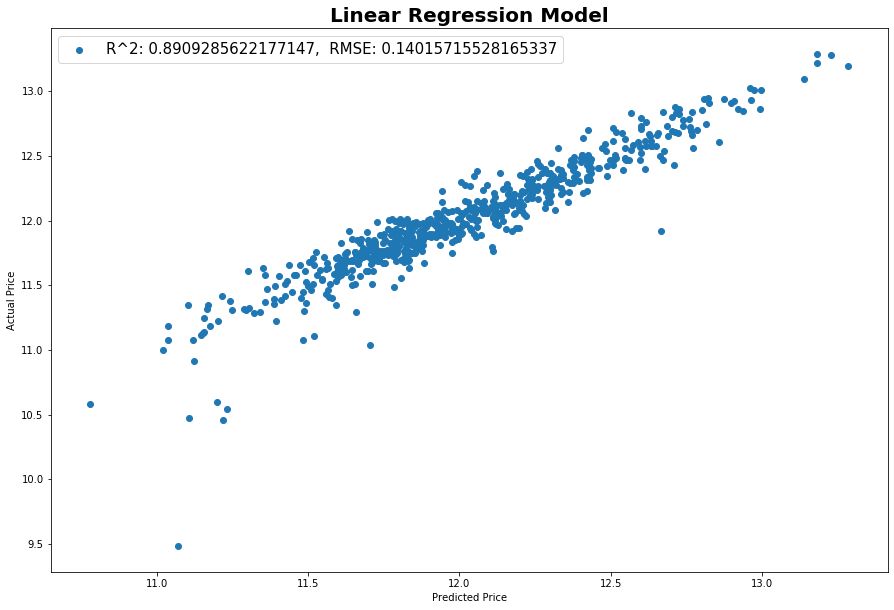

In [100]:
r_squared = model.score(X_test, y_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))


plt.figure(figsize = (15,10))
plt.scatter(predictions, y_test)

plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model', weight='bold', fontsize=20);
plt.legend(['R^2: {},  RMSE: {}'.format(r_squared, rmse)], loc = 'upper left', fontsize = 15);


#### Cross validation

Considering that my R^2 for X_train is higher than R^2 for X_test and cross validation, some overfitting is probably taking place. The Linear Regression model is placing high emphasis on street feature. Which is somewhat peculiar considering that it wasn't showing up on our high correlation features during our EDA. 

In [101]:
model.coef_
coef_model = pd.Series(model.coef_, index = X.columns)
coeficients_lr = pd.concat([coef_model.sort_values().head(20), coef_model.sort_values().tail(10)])

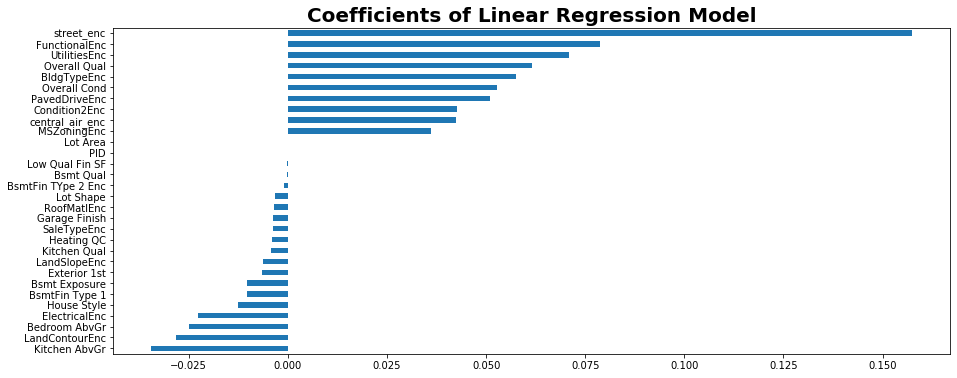

In [102]:
plt.figure(figsize = (15,6))
coeficients_lr.plot(kind = 'barh')
plt.title('Coefficients of Linear Regression Model', weight = 'bold', fontsize = 20);

In [103]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.8944112554818429

In [104]:
model.score(X_train, y_train)

0.9091677393342226

In [105]:
model.score(X_test, y_test)

0.8909285622177147

#### Making predictions

I was ready to use the test data set provided to make prediction for it's Sale Price. First, I dropped the index, Id, column again and made my predictions. Remember how we took the log of Sale Prices of the train data set above? This caused our Sale Price predictions came out in a loged form and I needed to reverse that. 

In [106]:
model2 = lr.fit(X,y) # for predictions fitting it to all the train data.

prediction_df = df_test.select_dtypes(
    include=[np.number]).drop(['Id', 'SalePrice'], axis=1)

test_predictions = model2.predict(prediction_df)


final_predictions = np.exp(test_predictions)

Last, I output my predictions in to the output folder that I created inside of the datasets folder. 

In [107]:
output_lr = pd.DataFrame()

output_lr['Id'] = df_test.Id

output_lr['SalePrice'] = final_predictions

output_lr.to_csv('datasets/output/output_lr.csv', index = False)


### Ridge Regression

In [108]:
ridge_cv = linear_model.RidgeCV(alphas = [0.01,0.1, 1.0, 10.0, 100.0])

In [109]:
model_cv = ridge_cv.fit(X_train, y_train)

In [110]:
model_cv.alpha_

10.0

/Users/yelenanevel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.08511e-19): result may not be accurate.
  overwrite_a=True).T


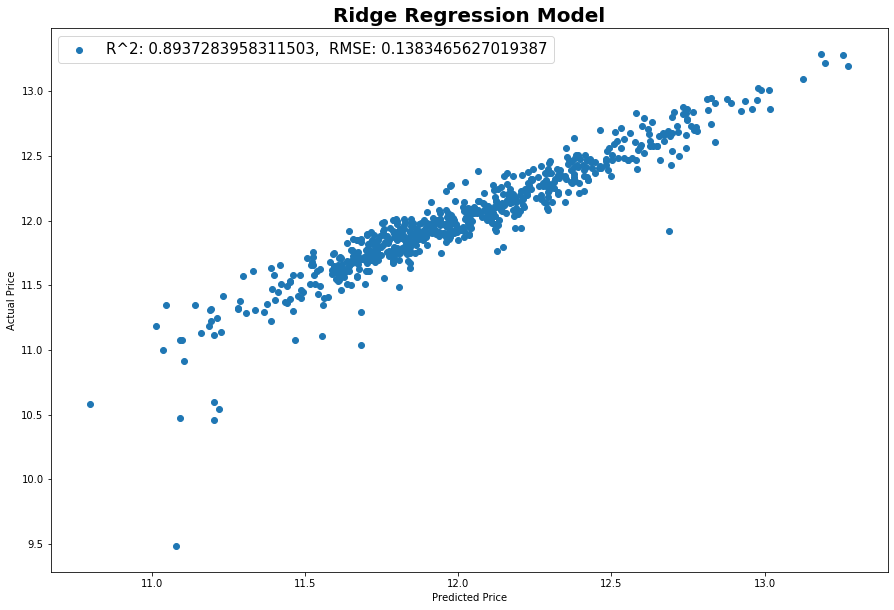

In [111]:
rr = linear_model.Ridge(alpha = 10.0)
model_rr = rr.fit(X_train, y_train)

predictions_rr = model_rr.predict(X_test)


r_squared_rr = model_rr.score(X_test, y_test)

rmse_rr = np.sqrt(mean_squared_error(y_test, predictions_rr))


plt.figure(figsize = (15,10))
plt.scatter(predictions_rr, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression Model', weight='bold', fontsize=20);
plt.legend(['R^2: {},  RMSE: {}'.format(r_squared_rr, rmse_rr)], loc = 'upper left', fontsize = 15);

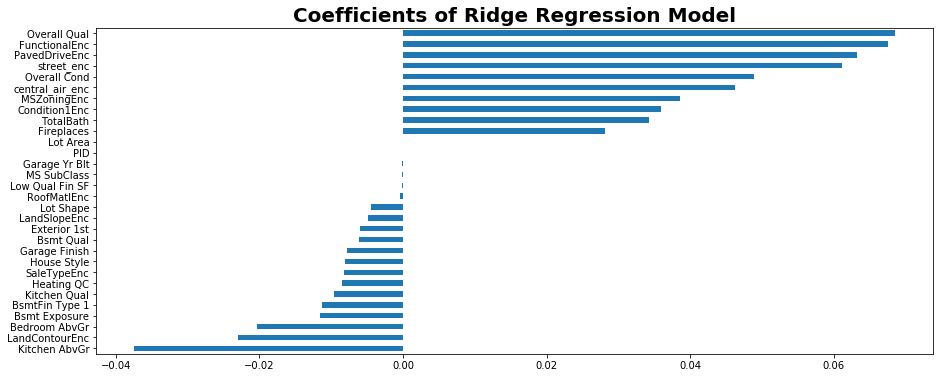

In [112]:
model_rr.coef_
coef_model_rr = pd.Series(model_rr.coef_, index = X.columns)
coeficients_rr = pd.concat([coef_model_rr.sort_values().head(20), coef_model_rr.sort_values().tail(10)])

plt.figure(figsize = (15,6))
coeficients_rr.plot(kind = 'barh')
plt.title('Coefficients of Ridge Regression Model', weight = 'bold', fontsize = 20);

In [113]:
model3 = rr.fit(X, y)

prediction_df = df_test.select_dtypes(
    include=[np.number]).drop(['Id', 'SalePrice'], axis=1)

rr_predictions = model3.predict(prediction_df)

final_predictions_rr = np.exp(test_predictions)

/Users/yelenanevel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44253e-19): result may not be accurate.
  overwrite_a=True).T


In [114]:
output_rr = pd.DataFrame()

output_rr['Id'] = df_test.Id

output_rr['SalePrice'] = final_predictions

output_rr.to_csv('datasets/output/output_rr.csv', index = False)

### Lasso Regression

In [115]:
lasso = linear_model.Lasso()
parameters = {'alpha': [0.001,0.01, 0.1, 1, 10, 100]}
lasso_reg = GridSearchCV(lasso, parameters, cv = 5)
lasso_reg.fit(X_train,y_train)
lasso_reg.best_params_

{'alpha': 0.001}

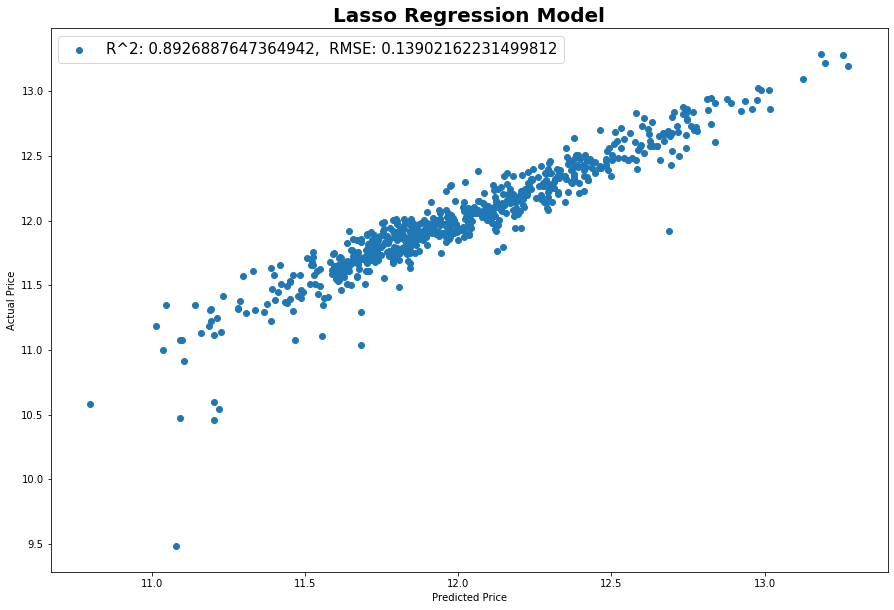

In [116]:
lasso = linear_model.Lasso(alpha = 0.001)
model_lasso = lasso.fit(X_train, y_train)

predictions_lasso = model_lasso.predict(X_test)


r_squared_lasso = model_lasso.score(X_test, y_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, predictions_lasso))


plt.figure(figsize = (15,10))
plt.scatter(predictions_rr, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso Regression Model', weight='bold', fontsize=20);
plt.legend(['R^2: {},  RMSE: {}'.format(r_squared_lasso, rmse_lasso)], loc = 'upper left', fontsize = 15);

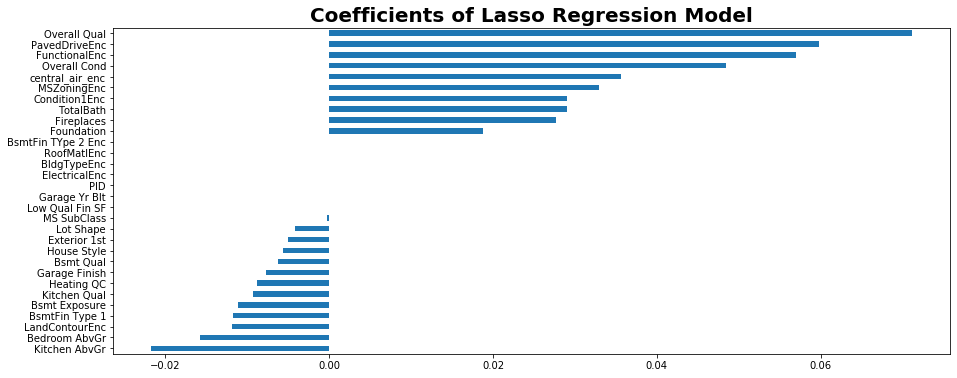

In [117]:
model_lasso.coef_
coef_model_lasso = pd.Series(model_lasso.coef_, index = X.columns)
coeficients_lasso = pd.concat([coef_model_lasso.sort_values().head(20), coef_model_lasso.sort_values().tail(10)])

plt.figure(figsize = (15,6))
coeficients_lasso.plot(kind = 'barh')
plt.title('Coefficients of Lasso Regression Model', weight = 'bold', fontsize = 20);

In [118]:
model4 = lasso.fit(X, y)

prediction_df = df_test.select_dtypes(
    include=[np.number]).drop(['Id', 'SalePrice'], axis=1)

lasso_predictions = model4.predict(prediction_df)

final_predictions_lasso = np.exp(test_predictions)

In [119]:
output_lasso = pd.DataFrame()

output_lasso['Id'] = df_test.Id

output_lasso['SalePrice'] = final_predictions

output_lasso.to_csv('datasets/output/output_lasso.csv', index = False)

### Conclusions and Recommendations

The Ridge regression in this model performed the best. It did have reasonable coefficients as well. The next step would be to standardize the numerical variables. Even though this is named Version 2, this was technically the first model that I ran, so Version 1 is the improved version. However, all things considered this model didn't do that bad. Even in case of Linear Regression where there was some small overfitting, it performed well on Kaggle public score board. 